#### Importación de bibliotecas

In [1]:
import pandas as pd

#### Carga del dataset

In [2]:
file = r"C:\Users\Ivan\Documents\Data_Analytics\Parte8_Simulación_Empresarial\ProjecteData\Equip_E\Data\alojamientos-turisticos-sample.csv"

df = pd.read_csv(file)
df.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,39.471490,-0.334600,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,41.383530,2.153880,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,40.466140,-3.809480,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,40.405070,-3.693183,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,42.107823,3.141601,...,8.0,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20


#### Exploración inicial

In [3]:
# tamaño
df.shape

(10000, 40)

In [4]:
# tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   md5                          10000 non-null  object 
 2   name                         9997 non-null   object 
 3   description                  9862 non-null   object 
 4   host_id                      10000 non-null  int64  
 5   neighborhood_overview        5899 non-null   object 
 6   neighbourhood_name           10000 non-null  object 
 7   neighbourhood_district       6079 non-null   object 
 8   latitude                     10000 non-null  float64
 9   longitude                    10000 non-null  float64
 10  room_type                    10000 non-null  object 
 11  accommodates                 10000 non-null  int64  
 12  bathrooms                    9926 non-null   float64
 13  bedrooms         

In [5]:
# valores nulos
df.isnull().sum()

apartment_id                      0
md5                               0
name                              3
description                     138
host_id                           0
neighborhood_overview          4101
neighbourhood_name                0
neighbourhood_district         3921
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                    0
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating        

In [6]:
# duplicados
df.duplicated().sum()

0

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


 Distribución Variables Numéricas:

                              Media  Desviación estándar  Mínimo  Q1 (25%)  \
latitude                      40.40                 1.42   36.65     39.71   
longitude                      0.28                 3.22   -6.03     -3.70   
accommodates                   4.27                 2.58    1.00      2.00   
bathrooms                      1.60                 0.99    0.00      1.00   
bedrooms                       1.94                 1.37    0.00      1.00   
beds                           2.92                 2.26    0.00      1.00   
price                        101.21                86.10    6.00     45.00   
minimum_nights                 4.95                17.73    1.00      1.00   
maximum_nights               759.77               498.37    1.00     62.00   
availability_30               13.01                11.84    0.00      0.00   
availability_60               28.76                22.97    0.00      2.00   
availability_90            

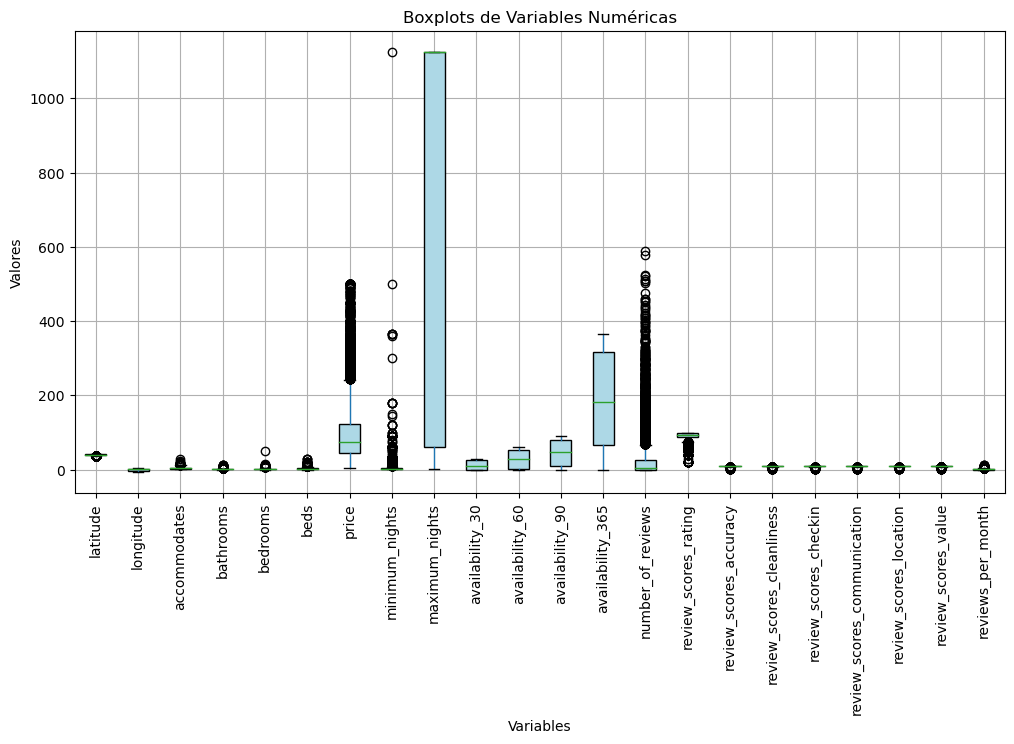

In [21]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas)

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

La distribución del precio revela una clara diferenciación entre los alojamientos estándar y los outliers, que corresponden a alojamientos de lujo. En cuanto a la variable maximum_nights, se observa que la mayoría de los alojamientos han tenido casos de clientes que se han hospedado durante un período prolongado, con una mediana que supera los 1000 días.

Por otro lado, en minimum_nights se detecta un outlier que supera los 1000 días, lo que podría deberse a que el alojamiento apenas recibe huéspedes o a un posible error de registro.

En cuanto a las columnas de disponibilidad a lo largo del tiempo, se aprecia que, a medida que el intervalo de tiempo se amplía, también lo hace la varianza, lo que sugiere la presencia de estacionalidad en la demanda de alojamientos.

El número de reviews presenta numerosos outliers, pero dado que no se dispone de información sobre los años, es posible que esta variable no sea demasiado explicativa. En contraste, la métrica reviews_per_month permitiría evaluar mejor el feedback de los huéspedes.